# IoT & Smart Analytics
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to

* distinguish between Feed Forward (fully connected) neural networks and Convolutional neural networks
* understand terms like filtering, convolution, pooling
* build CNN model to tackle fashion mnist dataset
* build CNN model to tackle digit mnist dataset
* know various CNN architectures: AlexNet 
* build AlexNet architecture using Keras Sequential API

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "P22I01E_test" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9876543456" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "CNN" #name of the notebook

def setup():
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "answer2" : Answer2,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://iot.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer1 Question")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer2 Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Information

The idea of the CNN was derived from the biological process of how the visual cortex is structured and works. 

As per the study of David H. and Torsten Wheel,
 
* neurons in the visual cortex have a local **receptive field** that means neurons will respond to stimuli only in the restricted region, and 

* receptive fields of all neurons combine to make the whole visual image. 

The above study inspired the paper Neocognitron in 1980 and which later evolved into Convolutional Neural networks (CNN).

The most important building block of a CNN is the convolutional layer.

### Convolutional Layers

Neurons in the first convolutional layer are not connected to every single pixel in the input image (like they were in the layers of DNN), but only to pixels in their receptive fields as shown in the figure below. In turn, each neuron in the second convolutional layer is connected only to neurons located within a receptive field in the first layer.

This architecture allows the network to concentrate on small low-level features in the first hidden layer, then assemble them into larger higher-level features in the next hidden layer, and so on.
<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/conv_layers_multiple_fmap.png" width=600px/>
</center>
$\hspace{6cm} \text {Convolutional layers with multiple feature maps, and images with three color channels}$
<br><br>

A neuron’s weights can be represented as a small image with the size of the receptive field. This is termed as **filter**. And, a layer full of neurons using the same filter outputs a **feature map**, which highlights the areas in an image that activate the filter the most.

**A convolutional layer has multiple filters and outputs one feature map per filter**, also:

* it has one neuron per pixel in each feature map, and all neurons within a given feature map share the same parameters (i.e., the same weights and bias term). 

* neurons in different feature maps use different parameters. 

* a neuron’s receptive field extends across all the previous layers’ feature maps i.e, its shape will be $f_h$ x $f_w$ x depth of previous layer, where $f_h$ and $f_w$ are the height and width of the receptive field. 

In short, a convolutional layer simultaneously applies multiple trainable filters to its inputs, making it capable of detecting multiple features anywhere in its inputs.

For instance, if the input image and the filter look like the following:
<br><br>
<center>
<img src="https://cdn.extras.talentsprint.com/IOT/Images/CNN_Initial.png" width=400px/>
</center>

$\hspace{10.5cm} \text {Input}   \hspace{4cm} \text {Kernel/Filter}$                               

The filter (green) slides over the input image (blue) one pixel at a time starting from the top left. The filter multiplies its own values with the overlapping values of the image while sliding over it and adds all of them up to output a single value for each overlap until the entire image is traversed:
<br><br>
<center>

![](https://cdn.extras.talentsprint.com/IOT/Images/CNN_Ani.gif)



</center>

In the case of images with multiple channels (e.g. RGB), the Kernel has the same depth as that of the input image. Convolution is performed between $K_n$ and $I_n$ stack ([$K_1,I_1$], [$K_2,I_2$], [$K_3,I_3$]) and all the results are summed with the bias to give us a squashed one-depth channel Convoluted Feature Output:

<br><br>
<center>
<img src="https://cdn.extras.talentsprint.com/IOT/Images/3Channel_CNN_Ani.gif" />
</center>



### **Single filter/kernel having two channel**
<br><br>
<center>
<img src="https://cdn.extras.talentsprint.com/IOT/Images/conv-multi-in.png" />
</center>

### **Two filter/kernel having three channel each**

<br><br>
<center>
<img src="https://cdn.extras.talentsprint.com/IOT/Images/conv-1x1.png" />
</center>


**Note that:** 

* all neurons located in the same row $i$ and column $j$ but in different feature maps are connected to the outputs of the exact same neurons in the previous layer.

* we do not have to define the filters manually: instead, during training, the convolutional layer will automatically learn the most useful filters for its task, and the layers above will learn to combine them into more complex patterns.

### Import required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, InputLayer, Conv1D, ReLU, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

#### Using a TensorFlow implementation, we will now understand convolutional operations on images

* Applying a convolutional filter
* Feature Map generation
* Stride and Padding



In TensorFlow, 

* each input image is typically represented as a 3D tensor of shape
[height, width, channels]. 

* A mini-batch is represented as a 4D tensor of shape [minibatch size, height, width, channels]. 

* The weights of a convolutional layer are represented as a 4D tensor of shape [$f_h$, $f_w$, $f_{n′}$, $f_n$]. 

* The bias terms of a convolutional layer are simply represented as a 1D tensor of shape [$f_n$].

where 

$f_h$ is filter (or receptive field) height, 

$f_w$ is filter width, 

$f_{n′}$ is number of feature maps in the previous layer (layer $l – 1$), and 

$f_n$ is number of feature maps in the current layer (layer $l$).

Let's creates two filters and apply them to any two MNIST digit  images.

In the following code we use Scikit-Learn’s `fetch_openml()` (which loads digit MNIST dataset).

#### Loading Data Digit MNIST Dataset
Using SciKit-Learns ```fetch_openml``` to load MNIST data.

In [ ]:
mnist = fetch_openml('mnist_784', cache=False)

Understanding the data:

In [ ]:
print('Data Shape :',mnist.data.shape,'\n')
print('Keys : ',mnist.keys(),'\n')
print('Description :', mnist.DESCR)

Data Shape : (70000, 784) 

Keys :  dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']) 

Description : **Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio.

Separating features and targets

In [ ]:
(X, y) = mnist["data"].values, mnist["target"].values
# Shape and datatype of X_train_full
X.shape, X.dtype


((70000, 784), dtype('float64'))

Converting label from string to int

In [ ]:
print(type(y[90]))
y = y.astype(np.uint8)
print(type(y[90]))

<class 'str'>
<class 'numpy.uint8'>


In [ ]:
sample_digit = X[12] # Check the result by putting different values in square bracket 
sample_digit_image = sample_digit.reshape(28, 28)
plt.imshow(sample_digit_image, cmap=mpl.cm.binary)
plt.show()

In [ ]:
sample_digit1 = X[2]
sample_digit2 = X[12]

In [ ]:
sample_digit1.shape

In [ ]:
# Scale image features
sample_digit1 =sample_digit1.reshape( 28, 28) / 255
sample_digit2 = sample_digit2.reshape(28, 28) / 255

# Visualize images
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].imshow(sample_digit1, cmap=mpl.cm.binary)
ax[1].imshow(sample_digit2, cmap=mpl.cm.binary)
plt.show()
sample_digit1.shape, sample_digit2.shape

In [ ]:
# Combine images as single 4D array
images = np.array([sample_digit1, sample_digit2])[:,:,:,np.newaxis]
batch_size, height, width, channels = images.shape
batch_size, height, width, channels

#### **Creating filters for horizontal and vertical edges**

Create two 7 × 7 filters (one with a vertical white line in the middle, and the other with a horizontal white line in the middle).

Note that shape should be [$f_h$, $f_w$, $f_{n′}$, $f_n$].

In [ ]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
# vertical line
filters[:, 3, :, 0] = 1 
# horizontal line
filters[3, :, :, 1] = 1
filters.shape

(7, 7, 1, 2)

In [ ]:
filters[:,:,:,0]

In [ ]:
filters[:,:,:,1]

Apply the filters to both images using the `tf.nn.conv2d()` function, which is part of TensorFlow’s low-level Deep Learning API. 

Here, we use zero padding (`padding="SAME"`) and a stride of 1.

In [ ]:
# Convolutional layer
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

In [ ]:
outputs.shape

TensorShape([2, 28, 28, 2])

In [ ]:
# Images' 1st feature map using vertical filter
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].imshow(outputs[0, :, :, 0], cmap="gray")
ax[1].imshow(outputs[1, :, :, 0], cmap="gray")
print("1st feature map through verticle filter")
plt.show()

In [ ]:
# Images' 2nd feature map using horizontal filter
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].imshow(outputs[0, :, :, 1], cmap="gray")
ax[1].imshow(outputs[1, :, :, 1], cmap="gray")
print("2nd feature map through horizontal filter")
plt.show()

In `tf.nn.conv2d()`:

* **images** is the input mini-batch (a 4D tensor).

* **filters** is the set of filters to apply (also a 4D tensor).

* **strides** is equal to 1, but it could also be a 1D array with four elements, where the two central elements are the vertical and horizontal strides ($s_h$ and $s_w$). The first and last elements must currently be equal to 1. They may one day be used to specify a batch stride (to skip some instances) and a channel stride (to skip some of the previous layer’s feature maps or channels).

* **padding** must be either "SAME" or "VALID":

  * If set to "SAME", the convolutional layer uses zero padding if necessary. The output size is set to the number of input neurons divided by the stride, rounded up. For example, if the input size is 13 and the stride is 5 as shown in the figure below, then the output size is 3 (i.e., 13 / 5 = 2.6, rounded up to 3). Then zeros are added as evenly as possible around the inputs, as needed.

  * If set to "VALID", the convolutional layer does not use zero padding and may
ignore some rows and columns at the bottom and right of the input image,
depending on the stride. This means that every neuron’s receptive field lies strictly within valid positions inside the input, hence the name valid.
<br><br>
<center>
<img src="https://wizardforcel.gitbooks.io/scikit-and-tensorflow-workbooks-bjpcjp/content/pics/padding-options.png" width=450px/>
</center>
$\hspace{9.5cm} \text {Different padding options}$

 #### **Zero Padding**
 <br><br>
<center>
<img src="https://cdn.extras.talentsprint.com/IOT/Images/zero_padding.png" />
</center>


**In the above example, we manually defined the filters, but in a real CNN we would normally define filters as trainable variables so the neural net can learn which filters work best. Instead of manually creating the variables,** use the `keras.layers.Conv2D` layer:

In [ ]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")

### Deepaer look into One Layer of a CNN


 <br><br>
<center>
<img src="https://cdn.extras.talentsprint.com/IOT/Images/One_Layer_CNN.png" width=750
px/>
</center>

<center>

**Equations** 

~--------------------------------------~

$Z^{[1]}=W^{[1]} \circledast A^{[0]} + b^{[1]}$

$A^{[1]}=ReLu(Z^{[1]})$

~--------------------------------------~

 **Shape of output :**

$$\frac{n+2p-f}{s} +1$$

~-------------------------------------~

**Example :** In this case: n=6, f=3, p=0, s=1

$$\frac{6+2*0-3}{1} +1=4$$


As we can see, convolutional layers have quite a few hyperparameters and we can use cross-validation to find the right values, but this is very time-consuming.

Also, CNNs' convolutional layers require a huge amount of RAM. This problem is taken care of by the second common building block of CNNs: the pooling layer.

### **Pooling Layers**

The goal of the pooling layer is to subsample (i.e., shrink) the input image in order to reduce the computational load, the memory usage, and the number of parameters. Each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer, located within a receptive field. 

However, **a pooling neuron has no weights**; all it does is aggregate the inputs using an aggregation function such as the **max** or **mean/average**. 

<br><br>
<center>
<img src="https://cdn.extras.talentsprint.com/IOT/Images/Max_Pool.png" width=500px/>
</center>
<br><br>

<br><br>
<center>
<img src="https://cdn.extras.talentsprint.com/IOT/Images/Average_Pool.png" width=500px/>
</center>
<br><br>

The below figure shows a max pooling layer, with a 2 × 2 pooling kernel, stride of 2 and no padding. Only the max input value in each receptive field makes it to the next layer. Because of the stride of 2, the output image has half the size of the input image.
<br><br>
<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/Pooling_layer.png" width=600px/>
</center>
$\hspace{7cm} \text {Max pooling layer (2x2 pooling kernel, stride 2, no padding)}$
<br><br>


#### Using a TensorFlow implementation, we will now understand pooling operation on images

* Applying a pooling layer
* Image compression

The following code creates a max pooling layer using a 2 × 2 kernel and applies it to `images`. The strides default to the kernel size, so this layer will use a stride of 2 (both horizontally and vertically):

In [ ]:
# Pooling layer
max_pool = keras.layers.MaxPool2D(pool_size=2, padding="valid", dtype='float64')(images)
max_pool.shape, max_pool[0].shape

To create an average pooling layer, just use AvgPool2D instead of MaxPool2D.

In [ ]:
# Images before and after pooling operation, showing only single channel
fig, ax = plt.subplots(2,2, figsize=(10,6))

ax[0][0].imshow(images[0, :, :, :].reshape(28, 28), cmap="gray")
ax[0][1].imshow(images[1, :, :, :].reshape(28, 28), cmap="gray")

ax[1][0].imshow(max_pool[0].numpy().reshape(14,14), cmap="gray")
ax[1][1].imshow(max_pool[1].numpy().reshape(14,14), cmap="gray")

print("Images before and after pooling operation:")
plt.show()

In [ ]:
# Compression ratio
original_bytes = images.nbytes
pooling_bytes = np.array(max_pool).nbytes
ratio = pooling_bytes / original_bytes
print("The compression ratio between the original images size and the total size after pooling is:", ratio)

The compression ratio between the original images size and the total size after pooling is: 0.25


From the above results, we can see that the images are shrunk.

Now we know all the building blocks to create convolutional neural networks.
Let's  understand a typical CNN architecture.

### **CNN Architecture**

Typical CNN architectures stack a few convolutional layers (generally followed by a ReLU layer), then a pooling layer, then another few convolutional layers (+ReLU), then another pooling layer, and so on. The image gets smaller and smaller as it progresses through the network, but it also gets deeper and deeper (i.e., with more feature maps), as shown in the figure below. At the top of the stack, a regular feedforward neural network is added, composed of a few fully connected layers (+ReLUs), and the final layer outputs the prediction.

<br><br>
<center>
<img src="https://i1.wp.com/thecleverprogrammer.com/wp-content/uploads/2020/11/1-cnnlayer.png?resize=1024%2C259&ssl=1" width=600px/>
</center>

$\hspace{11cm} \text {CNN architecture}$
<br><br>



### **CNN Example**

Have a look into the detailing of each step involved.

 <br><br>
<center>
<img src="https://cdn.extras.talentsprint.com/IOT/Images/CNN_Ex1.png" width=600 px/>

<img src="https://cdn.extras.talentsprint.com/IOT/Images/CNN_Ex2.png" width=600 px/>

<img src="https://cdn.extras.talentsprint.com/IOT/Images/CNN_Ex3.png" 
width=600 px/>

**Parameters Calculation of each layer**

<img src="https://cdn.extras.talentsprint.com/IOT/Images/CNN_Parameters.png" width=800 px/>



</center>

#### **CNN on Fashion MNIST dataset**
Here is how we can implement a simple CNN to tackle the Fashion MNIST dataset:

In [ ]:
# Using Keras to load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Visualize an image from data
print("Label: ", y_train_full[0])
plt.imshow(X_train_full[0], cmap='Greys')
plt.show()

In [ ]:
# Shape and datatype of X_train
X_train_full.shape, X_train_full.dtype

In [ ]:
# Split into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=123)
X_train.shape, X_val.shape

In [ ]:
# Reshape train, test, and validation data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_train.shape, X_val.shape, X_test.shape

<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/CNN_architecture_fmnist.png" width=900px/>
</center>
$\hspace{7.5cm} \text {CNN architecture used for Fashion MNIST dataset}$
<br><br>

The CNN architecture used for FMNIST dataset is shown in the figure above and its corresponding sequential model is created using the code below:

**Model Building**

In [ ]:
# Create model
model = Sequential([
                    Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
                    MaxPooling2D(2),

                    Conv2D(128, 3, activation="relu", padding="same"),

                    Conv2D(128, 3, activation="relu", padding="same"),
                    MaxPooling2D(2),

                    Conv2D(256, 3, activation="relu", padding="same"),
                    
                    Conv2D(256, 3, activation="relu", padding="same"),
                    MaxPooling2D(2),

                    Flatten(),
                    Dense(128, activation="relu"),
                    Dropout(0.5),
                    Dense(64, activation="relu"),
                    Dropout(0.5),
                    Dense(10, activation="softmax")
                    ])

Let’s go through this model:

* The first layer uses 64 fairly large filters (7 × 7) but no stride because the input images are not very large. It also sets input_shape=[28, 28, 1], because the images are 28 × 28 pixels, with a single color channel (i.e., grayscale).

* Next, we have a max pooling layer which uses a pool size of 2, so it divides each spatial dimension by a factor of 2.

* Then we repeat the same structure twice: two convolutional layers followed by a max pooling layer. For larger images, we could repeat this structure several more times (the number of repetitions is a hyperparameter we can tune).

* Note that the number of filters grows as we climb up the CNN toward the output layer (it is initially 64, then 128, then 256): since the number of low-level features is often fairly low (e.g., small circles, horizontal lines), but there are many different ways to combine them into higher-level features.

* Next is the fully connected network, composed of two hidden dense layers and a dense output layer. Note that we must flatten its inputs since a dense network expects a 1D array of features for each instance. We also add two dropout layers, to reduce overfitting.

In [ ]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

**Augentation**

Here we use `ImageDataGenerator` that generates batches of tensor image data with real-time data augmentation. The images output by the generator will have the same dimensions as the input images. It lets us augment the images in real-time while the model is still training. 

We can apply any random transformations on the training image as it is passed to the model. Few parameters are:

* **rescale**: scale the image
* **horizontal_flip**: randomly flip inputs horizontally
* **width_shift_range**: shift the image to the left or right (horizontal shifts)
* **height_shift_range**: shift the image vertically (up or down)
* **rotation_range**: degree range for random rotations of the image

To know more about ImageDataGenerator, click [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [ ]:
# Model Parameters
batch_size = 256

# Instantiate ImageDataGenerator
gen = ImageDataGenerator(rescale = 1.0/255, 
                         width_shift_range = 0.005,
                         height_shift_range = 0.005,
                         rotation_range = 0,
                         horizontal_flip = True)

# Generate batches of tensor image data
train_batches = gen.flow(X_train, y_train, batch_size = batch_size)
val_batches = gen.flow(X_val, y_val, batch_size = batch_size)

**Note:** Use [`flow_from_directory()`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory) to load images from the directory. It takes the path to a directory & generates batches of augmented data.

**Training the Model**

In [ ]:
# Train the model
history = model.fit(train_batches,
                    steps_per_epoch = X_train.shape[0]//batch_size,
                    epochs = 1,
                    validation_data = val_batches,
                    validation_steps = X_val.shape[0]//batch_size)

In [ ]:
# Instantiate ImageDataGenerator
test_gen = ImageDataGenerator(rescale=1.0/255)
# Generate batches of tensor image data
test_batches = test_gen.flow(X_test, y_test, batch_size= 50)

# Evaluate Model against test data and get the score
score = model.evaluate(test_batches)

# Print Metrics
print('Test loss:', score[0])
print('Test accuracy:', score[1])

By increasing the number of epochs, the accuracy can be improved.

**Predictions**

In [ ]:
# Predict class probabilities for first three instances of X_test
X_new = X_test[-3:]
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
# List of labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# Predict class labels for first three instances of X_test
y_pred = np.argmax(model.predict(X_new), axis=-1)
print("Predicted labels: \n", y_pred)

print(np.array(class_names)[y_pred])

In [ ]:
# Actual labels
fig, ax = plt.subplots(1,3)
for axi, i in zip(ax.ravel(), np.arange(len(X_new))):
    axi.imshow(X_new[i].reshape(28, 28), cmap='Greys')

From the above results, we can see the performance of network on three images.

#### **CNN on Digit MNIST Dataset**
#### Loading Data:
Using SciKit-Learns ```fetch_openml``` to load MNIST data

In [ ]:
mnist = fetch_openml('mnist_784', cache=False)

**Understanding the data**

In [ ]:
print('Data Shape :',mnist.data.shape,'\n')
print('Keys : ',mnist.keys(),'\n')
print('Description :', mnist.DESCR)

**Separating features and targets**

In [ ]:
(X, y) = mnist["data"].values, mnist["target"].values
# Shape and datatype of X_train_full
X.shape, X.dtype


**Converting label from string to int**

In [ ]:
print(type(y[90]))
y = y.astype(np.uint8)
print(type(y[90]))

In [ ]:
X_train_full, X_test, y_train_full, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# Shape and datatype of X_train
X_train_full.shape, X_train_full.dtype

In [ ]:
# Split into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=123)
X_train.shape, X_val.shape

**Visualizing the data set**

In [ ]:
sample_digit = X_train[60] # Check the result by putting different values in square bracket 
sample_digit_image = sample_digit.reshape(28, 28)
plt.imshow(sample_digit_image, cmap=mpl.cm.binary)
plt.show()

In [ ]:
y_train[60] 

4

In [ ]:
# Reshape train, test, and validation data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_train.shape, X_val.shape, X_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

**Model Building**

In [ ]:
model = Sequential([
                    Conv2D(64,3, activation="relu", padding="same", input_shape=[28, 28, 1]),
                    BatchNormalization(),
                    MaxPooling2D(2),

                    Conv2D(64,3, activation="relu", padding="same"),
                    BatchNormalization(),
                    MaxPooling2D(2),

                    Conv2D(32,3, activation="relu", padding="same", input_shape=[28, 28, 1]),
                    BatchNormalization(),
                    MaxPooling2D(2),

                    Flatten(),
                    Dense(64, activation="relu"),
                    Dropout(0.25),
                    Dense(32, activation="relu"),
                    Dropout(0.25),
                    Dense(10, activation="softmax")
                    ])

In [ ]:
# Summary of model
model.summary()

In [ ]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

**Data Augmentation**

In [ ]:
# Model Parameters
batch_size = 256

# Instantiate ImageDataGenerator
gen = ImageDataGenerator(rescale = 1.0/255, 
                         width_shift_range = 0.2,
                         height_shift_range = 0.2,
                         rotation_range = 0,
                         horizontal_flip = True)

# Generate batches of tensor image data
train_batches = gen.flow(X_train, y_train, batch_size = batch_size)
val_batches = gen.flow(X_val, y_val, batch_size = batch_size)

**Training the model**

In [ ]:
# Train the model
history = model.fit(train_batches,
                    steps_per_epoch = X_train.shape[0]//batch_size,
                    epochs = 5,
                    validation_data = val_batches,
                    validation_steps = X_val.shape[0]//batch_size)

In [ ]:
# Instantiate ImageDataGenerator
test_gen = ImageDataGenerator(rescale=1.0/255)
# Generate batches of tensor image data
test_batches = test_gen.flow(X_test, y_test, batch_size= 50)

# Evaluate Model against test data and get the score
score = model.evaluate(test_batches)

# Print Metrics
print('Test loss:', score[0])
print('Test accuracy:', score[1])

**Predictions**

In [ ]:
# Predict class probabilities for first three instances of X_test
X_new = X_test[-3:]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
# Predict class labels for first three instances of X_test
y_pred = np.argmax(model.predict(X_new), axis=-1)
print("Predicted labels: \n", y_pred)

Predicted labels: 
 [4 5 6]


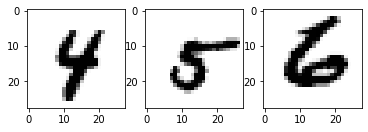

In [ ]:
# Actual labels
fig, ax = plt.subplots(1,3)
for axi, i in zip(ax.ravel(), np.arange(len(X_new))):
    axi.imshow(X_new[i].reshape(28, 28), cmap='Greys')

From the above results, we can see the performance of network on three images.

### Classic Networks:
* LeNet
* AlexNet
* VGG
* ResNet
* Inception

### AlexNet
Now, let's look at the AlexNet architecture.

The AlexNet CNN architecture won the 2012 ImageNet ILSVRC challenge by a
large margin. It was developed by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton. It was the first to stack convolutional layers directly on top of one another, instead of stacking a pooling layer on top of each convolutional layer. The table given below presents this architecture.
<br><br>

|  Layer  |  Type  | Maps  |  Size  |  Kernel Size | Stride  |  Padding  |  Activation  
|:--------------|:-----------|:-----------|:-----------|:-----------|:-----------|:-----------|:-----------|
|  Out  | Fully connected | - |  1,000 | - | - | - | Softmax |
| F10 | Fully connected | - | 4,096 | - | - | - | ReLU |
| F9 | Fully connected | - | 4,096 | - | - | - | ReLU |
| S8 | Max pooling | 256 | 6 x 6 | 3 x 3 | 2 | valid | - |
| C7 | Convolution | 256 | 13 x 13 | 3 x 3 | 1 | same | ReLU |
| C6 | Convolution | 384 | 13 x 13 | 3 x 3 | 1 | same | ReLU |
| C5 | Convolution | 384 | 13 x 13 | 3 x 3 | 1 | same | ReLU |
| S4 | Max pooling | 256 | 13 x 13 | 3 x 3 | 2 | valid | - |
| C3 | Convolution | 256 | 27 x 27 | 5 x 5 | 1 | same | ReLU |
| S2 | Max pooling | 96 | 27 x 27 | 3 x 3 | 2 | valid | - |
| C1 | Convolution | 96 | 55 x 55 | 11 x 11 | 4 | valid | ReLU |
| In | Input | 3 (RGB) | 227 x 227 | - | - | - | - |

$\hspace{11cm} \text {AlexNet architecture}$
<br><br>

To reduce overfitting, the authors used two regularization techniques: 

* **dropout** with a 50% dropout rate during training to the outputs of layers F9 and F10

* **data augmentation** by randomly shifting the training images by various offsets, flipping them horizontally, and changing the lighting conditions.

Let's build the AlexNet architecture and train it on the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. The dataset contains 60,000 colour images, each with dimensions 32x32px. The content of the images within the dataset is sampled from 10 classes.


In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [ ]:
# List to refer labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

By default, the CIFAR dataset is partitioned into 50,000 training data and 10,000 test data.

In [ ]:
# Shape of train and test images
train_images.shape, test_images.shape

Instead of taking all the 50000 instances for training, we will only use the first 5000 instances as validation set and next the 5000 instances as training set.

In [ ]:
# Validation data
val_images, val_labels = train_images[:5000], train_labels[:5000]
# Training data
train_images, train_labels = train_images[5000:10000], train_labels[5000:10000]

To ease data manipulation and modification we transform the dataset into a TensorFlow dataset using `tf.data.Dataset.from_tensor_slices` method.

In [ ]:
# Convert to TensorFlow dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels))

In [ ]:
# Visualize few images
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_ds.take(5)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(class_names[label.numpy()[0]])
    plt.axis('off')

Now as per the network, we need to do few preprocessing steps:

* Normalize images to have a mean of 0 and standard deviation of 1

* Resizing of the images from 32 x 32 to 227 x 227. The AlexNet network input expects a 227x227 image.

We create a function called `process_images` for this purpose.

In [ ]:
def process_images(image, label):
    ''' Normalize images to have a mean of 0 and standard deviation of 1, 
        resize images from 32x32 to 227x227 '''
    image = tf.image.per_image_standardization(image)
    image = tf.image.resize(image, (227,227))
    return image, label

In [ ]:
# Size of training, testing, validation set
train_ds_size = len(train_ds)
test_ds_size = len(test_ds)
val_ds_size = len(val_ds)
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", val_ds_size)

In [ ]:
# Perform preprocessing with shuffle and batch data operations
train_ds = (train_ds.map(process_images)
                    .shuffle(buffer_size=train_ds_size)
                    .batch(batch_size=32, drop_remainder=True))

test_ds = (test_ds.map(process_images)
                  .shuffle(buffer_size=test_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

val_ds = (val_ds.map(process_images)
                .shuffle(buffer_size=val_ds_size)
                .batch(batch_size=32, drop_remainder=True))

Model implementation

In [ ]:
# Create AlexNet CNN architecture
model = Sequential([
                    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
                    BatchNormalization(),
                    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
                    BatchNormalization(),
                    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
                    Flatten(),
                    Dense(4096, activation='relu'),
                    Dropout(0.5),
                    Dense(4096, activation='relu'),
                    Dropout(0.5),
                    Dense(10, activation='softmax')
                    ])

In [ ]:
# Compile model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.optimizers.SGD(learning_rate = 0.001), metrics = ['accuracy'])

# Model summary
model.summary()

In [ ]:
# Train model on training set
history = model.fit(train_ds, epochs = 1, validation_data = val_ds)

In [ ]:
# Model performance on test set
model.evaluate(test_ds)

By increasing the number of training instances and epochs, the model performance can be increased.

Other than AlexNet we have few more CNN architectures such as ResNet.

### Theory Questions

1. What are the advantages of a CNN over a fully connected DNN for image classification?

 These are the main advantages of a CNN over a fully connected DNN for image
classification:

  * Because consecutive layers are only partially connected and because it heavily reuses its weights, a CNN has many fewer parameters than a fully connected DNN, which makes it much faster to train, reduces the risk of overfitting, and requires much less training data.
  
  * When a CNN has learned a kernel that can detect a particular feature, it can
detect that feature anywhere in the image. In contrast, when a DNN learns a
feature in one location, it can detect it only in that particular location. Since images typically have very repetitive features, CNNs are able to generalize much better than DNNs for image processing tasks such as classification, using fewer training examples.

  * Finally, a DNN has no prior knowledge of how pixels are organized; it does not know that nearby pixels are close. A CNN’s architecture embeds this prior
knowledge. Lower layers typically identify features in small areas of the images, while higher layers combine the lower-level features into larger features. This works well with most natural images, giving CNNs a decisive head start compared to DNNs.

2. Why would you want to add a max pooling layer rather than a convolutional
layer with the same stride?

 A max pooling layer has no parameters at all, whereas a convolutional layer has
quite a few.

## Please answer the questions below to complete the experiment:




In [ ]:
#@title Select the FALSE statement:  { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "" #@param ["","VALID padding will include all the rows and columns whereas SAME padding may ignore some rows and columns of the input image", "A higher stride means higher information loss but resultant less computation", "A max pooling layer does not have any parameter", "All of above"]


In [ ]:
#@title Which of the following methods DOES NOT prevent a model from overfitting to the training set?.{ run: "auto", form-width: "500px", display-mode: "form" }
Answer2 = "" #@param ["","Early stopping", "Data augmentation","Pooling","Dropout","None of the above"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Excellent", "Very Good", "Good", "Average"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

### **Task**
Create a CNN model again for Digit MNIST DataSet using the given architecture below:
<center>
<img src="https://cdn.extras.talentsprint.com/IOT/Images/CNN_Practice.png" 
width=700 px/>

</center>

* Use batch normalization and dropout and play with the layer, neurons, other parameters/hyperparameters and check the accuracy.

* Keep epoch less than 5/6 initially.

* Complete all the steps till the last predictin and visualization.




